# Muhammad Zalfa Thoriq
# 1301194473
# IF-42-GAB05

In [2]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

Note: You might need to play with the explore values in order to fix any overlapping slice values.

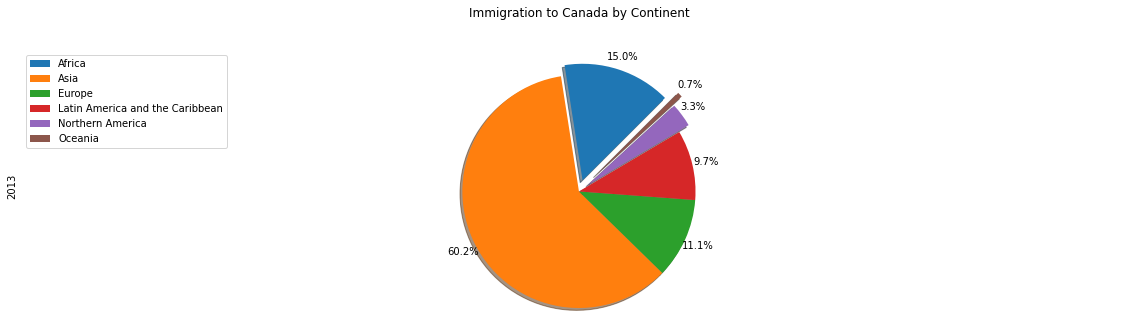

In [7]:

df_cont = df_can.groupby('Continent', axis=0).sum()
df_cont
df_cont = df_can.groupby('Continent', axis=0).sum()
explode_list = [0.1, 0, 0, 0, 0.1, 0.2]

df_cont['2013'].plot(kind='pie',
                            figsize=(20,5),
                            autopct='%1.1f%%', 
                            startangle=45,    
                            shadow=True,       
                            labels=None,                 
                            pctdistance=1.12,           
                            explode=explode_list         
                            )

plt.title('Immigration to Canada by Continent', y = 1.1) 
plt.legend(labels=df_cont.index, loc='upper left') 
plt.axis('equal') 

plt.show()

**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

In [9]:
df_pa = df_can.loc[['Pakistan','Afghanistan'], years].transpose()
df_pa.head()

Country,Pakistan,Afghanistan
1980,978,16
1981,972,39
1982,1201,39
1983,900,47
1984,668,71


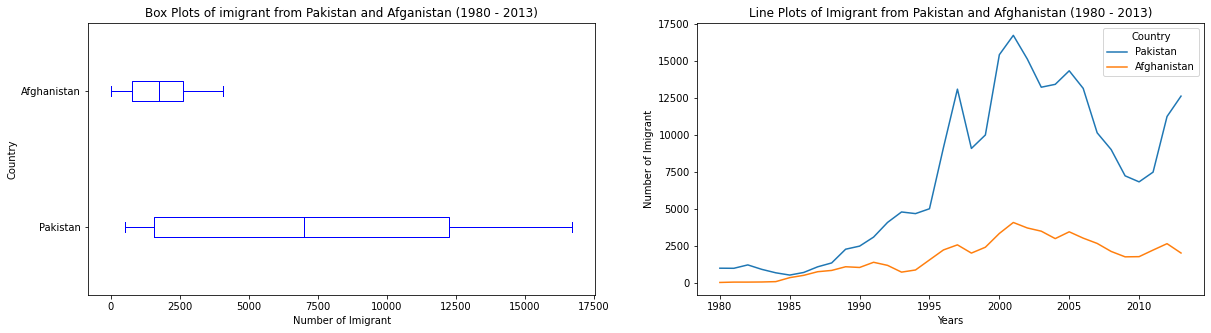

In [12]:
#Plot data
fig = plt.figure()

ax0 = fig.add_subplot(1 ,2 ,1)
ax1 = fig.add_subplot(1, 2, 2)

#Box plot
df_pa.plot(kind='box', color='blue', vert=False, figsize=(20, 5), ax=ax0)
ax0.set_title('Box Plots of imigrant from Pakistan and Afganistan (1980 - 2013)')
ax0.set_xlabel('Number of Imigrant')
ax0.set_ylabel('Country')

#Line plot
df_pa.plot(kind='line', figsize=(20, 5), ax=ax1)
ax1.set_title ('Line Plots of Imigrant from Pakistan and Afghanistan (1980 - 2013)')
ax1.set_ylabel('Number of Imigrant')
ax1.set_xlabel('Years')

plt.show()

**Question 3:** Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

In [18]:
#1
df_countri = df_can.loc[['Denmark', 'Norway', 'Sweden'],years].transpose()

#2
df_total = pd.DataFrame(df_countri.sum(axis=1))

#3
df_total.reset_index(inplace=True)

#4
df_total.columns = ['year', 'total']

#5
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


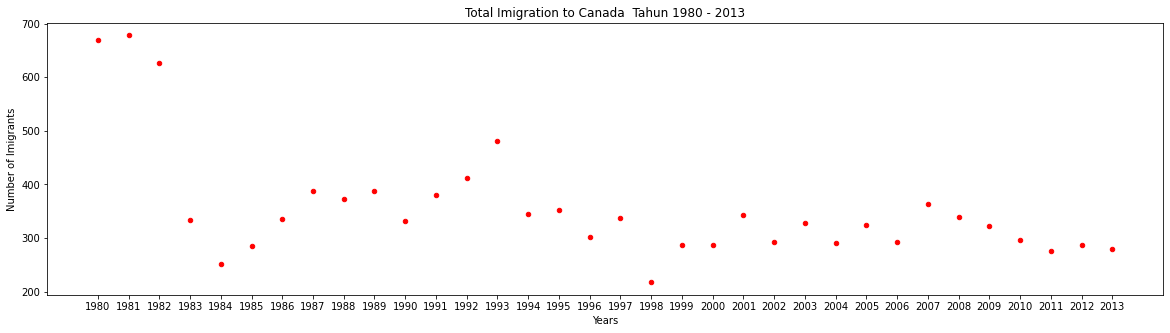

In [19]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(20, 5), color='red')

plt.title('Total Imigration to Canada  Tahun 1980 - 2013')
plt.xlabel('Years')
plt.ylabel('Number of Imigrants')

plt.show()

**Question 4:** Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

In [21]:
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)

df_can_t.head()
 # normalisasi china
normal_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalisasi india
normal_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

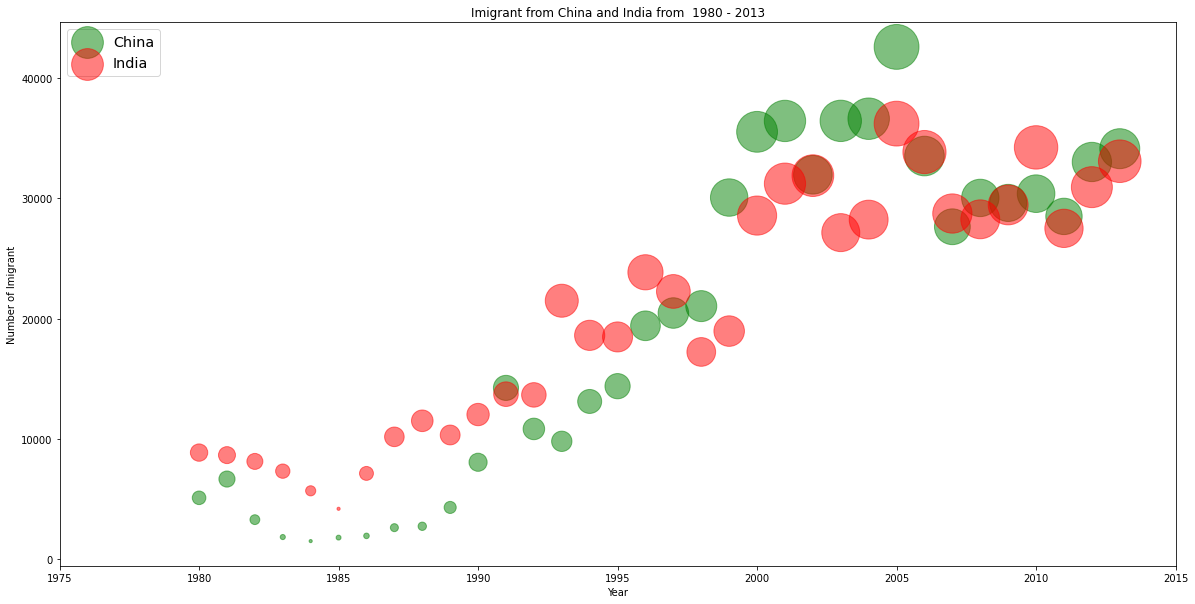

In [25]:
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(20, 10),
                    alpha=0.5,                
                    color='green',
                    s=normal_china * 2000 + 10,
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="red",
                    s=normal_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Imigrant')
ax0.set_title('Imigrant from China and India from  1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')